In [1]:
import warnings; warnings.simplefilter('ignore')
import csv
import matplotlib.pyplot as plt 
import numpy as np 
import os
from sklearn.preprocessing import StandardScaler
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D

In [19]:
def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

class MyLogisticRegressionMultiLabel: 
    def __init__(self, learning_rate: float = 0.001, no_epochs: int = 1000, gd_type: str = 'stochastic'):
        self.intercept_ = []
        self.coef_ = []
        self.__learning_rate = learning_rate
        self.__no_epochs = no_epochs
        if gd_type == 'stochastic':
            self.fit = self.fit
        else:
            raise ValueError('Unknown GD type')

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, x, y):
        self.coef_ = []
        self.intercept_ = []
        labels = list(sorted(set(y)))
        for label in labels:
            coef = [random.random() for _ in range(len(x[0]) + 1)]
            for _ in range(self.__no_epochs):
                for i in range(len(x)):
                    y_computed = self.sigmoid(self.eval(x[i], coef))
                    crt_error = y_computed - 1 if y[i] == label else y_computed
                    for j in range(1, len(coef)):
                        coef[j] -= self.__learning_rate * crt_error * x[i][j - 1]
                    coef[0] -= self.__learning_rate * crt_error * 1
            self.intercept_.append(coef[0])
            self.coef_.append(coef[1:])

    def score(self, x_test, y_test):
        predictions = self.predict(x_test)

        correct_predictions = sum(1 for pred, true in zip(predictions, y_test) if pred == true)
        total_samples = len(y_test)
        accuracy = correct_predictions / total_samples

        return accuracy
    
    def eval(self, xi: list, coef: list):
        yi = coef[0]
        for j in range(len(xi)):
            yi += coef[j + 1] * xi[j]
        return yi

    def predict_one_sample(self, sample_features: list):
        predictions = []
        for intercept, coefficient in zip(self.intercept_, self.coef_):
            computed_value = self.eval(sample_features, [intercept] + coefficient)
            predictions.append(self.sigmoid(computed_value))  # Corectare aici
        return predictions.index(max(predictions))


    def predict(self, in_test: list):
        computed_labels = [self.predict_one_sample(sample) for sample in in_test]
        return computed_labels

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2]]


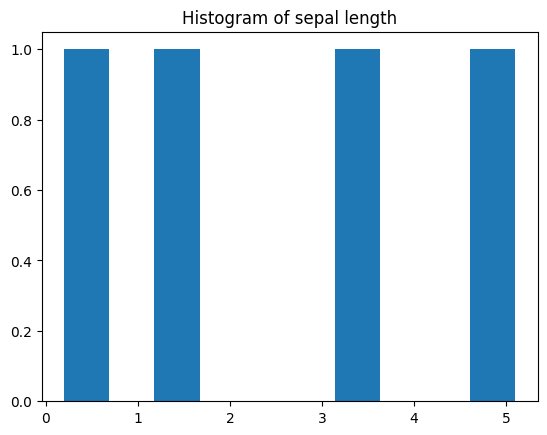

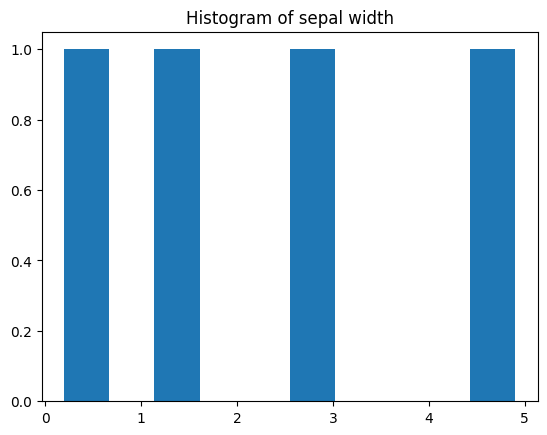

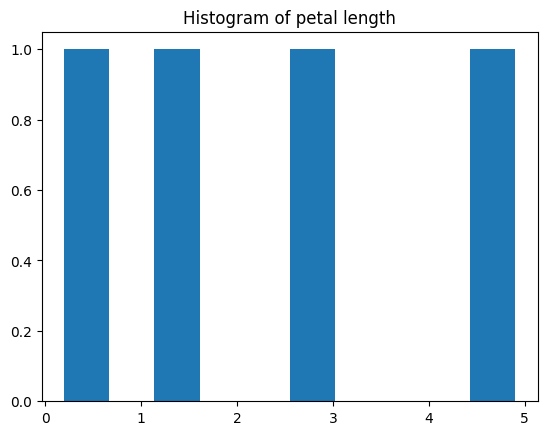

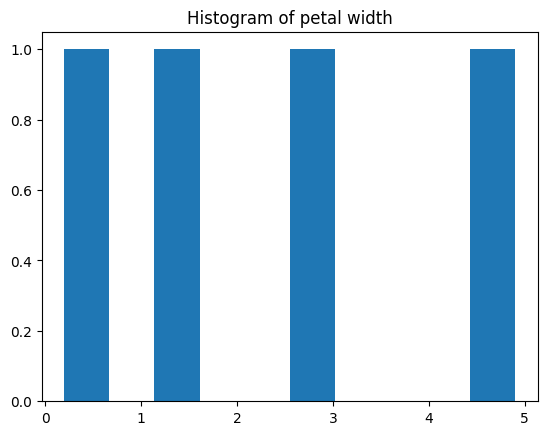

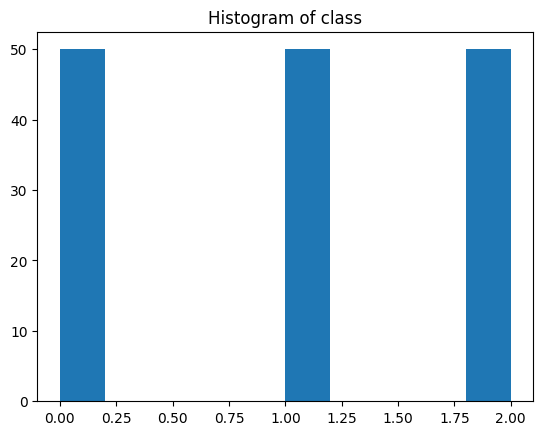

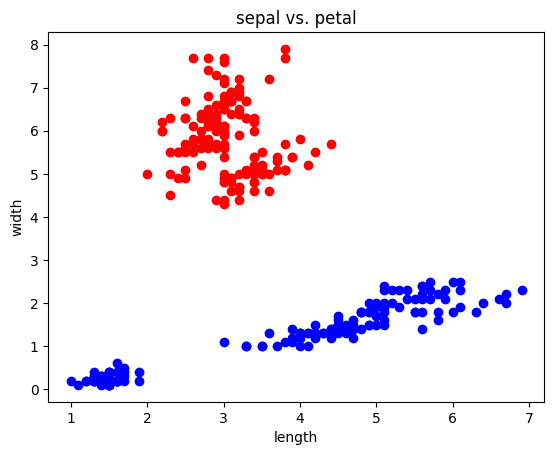

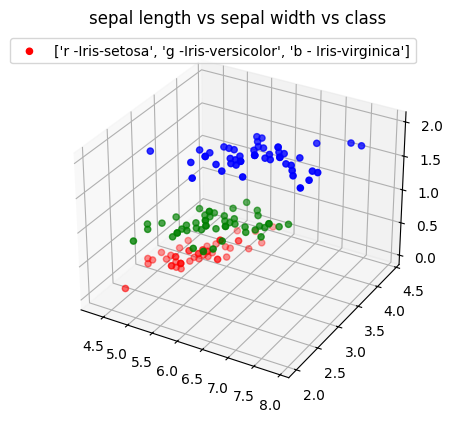

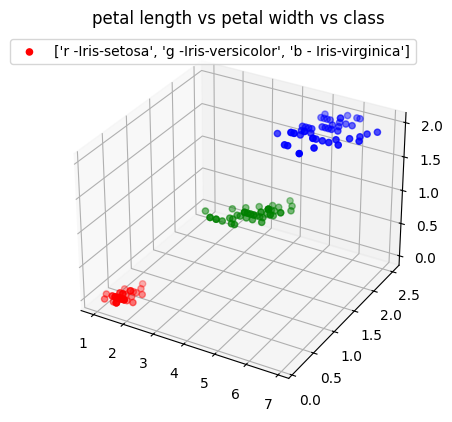

In [20]:
def loadDataMoreInputs(fileName, inputVariabNames, outputVariabName):
    def transform_output(output):
        if output == 'Iris-setosa':
            return 0
        elif output == 'Iris-versicolor':
            return 1
        elif output == 'Iris-virginica':
            return 2
        else:
            raise ValueError("Clasa de ieșire necunoscută: {}".format(output))

    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariables = [dataNames.index(var) for var in inputVariabNames]
    inputs = [[float(data[i][j]) for j in selectedVariables] for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [transform_output(data[i][selectedOutput]) for i in range(len(data))]
    
    return inputs, outputs

def plot3Ddata(x1Train, x2Train, yTrain, x1Model=None, x2Model=None, yModel=None, x1Test=None, x2Test=None, yTest=None, title=None):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    ax = plt.axes(projection='3d')
    
    if x1Train is not None:
        colors = ['r' if y == 0 else 'g' if y == 1 else 'b' for y in yTrain]
        labels = ['r -Iris-setosa', 'g -Iris-versicolor', 'b - Iris-virginica']
        ax.scatter(x1Train, x2Train, yTrain, c=colors, marker='o', label=labels)
    if x1Model is not None:
        ax.scatter(x1Model, x2Model, yModel, c='b', marker='o', label='learnt model')
    if x1Test is not None:
        ax.scatter(x1Test, x2Test, yTest, c='black', marker='^', label='test data')
    
    plt.title(title)
    plt.legend()
    plt.show()


def plot3DdataEstetic(x1Train, x2Train, yTrain, x1Model=None, x2Model=None, yModel=None, x1Test=None, x2Test=None, yTest=None, title=None):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    ax = plt.axes(projection='3d')
    
    if x1Train is not None:
        colors = ['r' if y == 0 else 'g' if y == 1 else 'b' for y in yTrain]
        labels = ['r -Iris-setosa', 'g -Iris-versicolor', 'b - Iris-virginica']
        ax.scatter(x1Train, x2Train, yTrain, c=colors, marker='o', label=labels)
    if x1Model is not None:
        ax.scatter(x1Model, x2Model, yModel, c='b', marker='o', label='Data 2')
    if x1Test is not None:
        ax.scatter(x1Test, x2Test, yTest, c='g', marker='^', label='Data 3')
    
    plt.title(title)
    plt.legend()
    plt.show()


def plot2Ddata(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'D:\FACULTATE\SEM4\AI\Lab6\iris', 'iris.csv')

inputs, outputs = loadDataMoreInputs(filePath, ['sepal length', 'sepal width', 'petal length', 'petal width'], 'class')
print(outputs)
print(inputs[:5])

feature1 = [ex[0] for ex in inputs]
feature2 = [ex[1] for ex in inputs]
feature3 = [ex[2] for ex in inputs]
feature4 = [ex[3] for ex in inputs]

# plot the data histograms
plot2Ddata(inputs[0], "sepal length")
plot2Ddata(inputs[1], "sepal width")
plot2Ddata(inputs[1], "petal length")
plot2Ddata(inputs[1], "petal width")

plot2Ddata(outputs, 'class')


plt.plot(feature2, feature1, 'ro') 
plt.plot(feature3,feature4,'bo')
plt.xlabel('length')
plt.ylabel('width')
plt.title('sepal vs. petal')
plt.show()

# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variables (x1 = capita, x2 = freedom).)
plot3DdataEstetic(feature1, feature2, outputs, title='sepal length vs sepal width vs class')
plot3DdataEstetic(feature3, feature4, outputs, title='petal length vs petal width vs class')


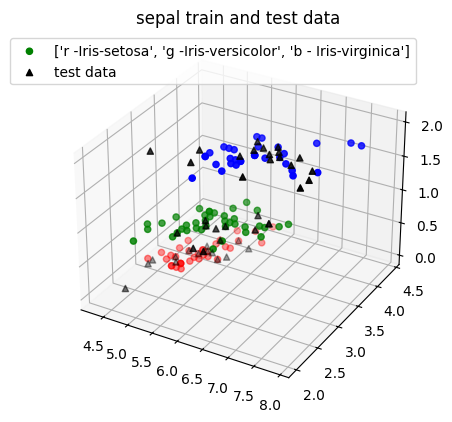

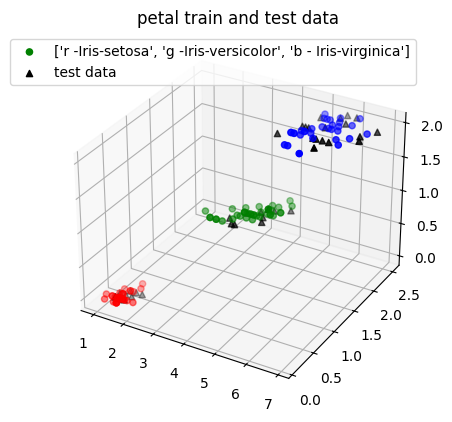

In [21]:
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.7 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]


feature1train = [ex[0] for ex in trainInputs]
feature2train = [ex[1] for ex in trainInputs]
feature3train = [ex[2] for ex in trainInputs]
feature4train = [ex[3] for ex in trainInputs]

feature1test = [ex[0] for ex in testInputs]
feature2test = [ex[1] for ex in testInputs]
feature3test = [ex[2] for ex in testInputs]
feature4test = [ex[3] for ex in testInputs]

plot3Ddata(feature1train, feature2train, trainOutputs, None, None, None, feature1test, feature2test, testOutputs, "sepal train and test data")
plot3Ddata(feature3train, feature4train, trainOutputs, None, None, None, feature3test, feature4test, testOutputs, "petal train and test data")


In [22]:
# Inițializează și antrenează modelul
import random
from math import exp
model = MyLogisticRegressionMultiLabel(learning_rate=0.001, no_epochs=1000, gd_type='stochastic')
model.fit(trainInputs, trainOutputs)


accuracy = model.score(testInputs, testOutputs)
print("Accuracy:", accuracy)

w0 = model.intercept_
w1, w2, w3, w4 = model.coef_[0][0], model.coef_[0][1], model.coef_[0][2], model.coef_[0][3]


print("Model coefficients:")
print("f(x) =  1/ 1+ e^-z... z= ", w0, ' + ', w1, ' * x1 + \n\t\t\t', w2, ' * x2' , w3, ' * x4', w4, ' * x4')

Accuracy: 0.9555555555555556
Model coefficients:
f(x) =  1/ 1+ e^-z... z=  [0.7786597855779541, 1.5594843350058383, -0.8365650667073172]  +  0.1736234632713446  * x1 + 
			 2.1468849754660697  * x2 -2.712500233628246  * x4 -1.323889436126164  * x4


In [17]:
import numpy as np
from statistics import mean
trainInputs = np.array(trainInputs)
noOfPoints = 1000
xref1 = []
val = min(trainInputs[:, 0])
step1 = (max(trainInputs[:, 0]) - min(trainInputs[:, 0])) / noOfPoints
for _ in range(noOfPoints):
    xref1.append(val)
    val += step1

xref2 = []
val = min(trainInputs[:, 1])
step2 = (max(trainInputs[:, 1]) - min(trainInputs[:, 1])) / noOfPoints
for _ in range(noOfPoints):
    xref2.append(val)
    val += step2

xref3 = []
val = min(trainInputs[:, 2])
step3 = (max(trainInputs[:, 2]) - min(trainInputs[:, 2])) / noOfPoints
for _ in range(noOfPoints):
    xref3.append(val)
    val += step2

xref4 = []
val = min(trainInputs[:, 3])
step2 = (max(trainInputs[:, 3]) - min(trainInputs[:, 3])) / noOfPoints
for _ in range(noOfPoints):
    xref4.append(val)
    val += step2

yref = [1 / (1 + np.exp(-(w0 + w1 * el1 + w2 * el2 + w3 * el3 + w4 * el4))) for el1, el2, el3, el4 in zip(xref1, xref2, xref3, xref4)]
print(yref[:5])

[array([0.9535776 , 0.98407431, 0.78766003]), array([0.95344664, 0.98402795, 0.7871655 ]), array([0.95331534, 0.98398145, 0.78667014]), array([0.95318368, 0.98393482, 0.78617393]), array([0.95305167, 0.98388805, 0.78567689])]


In [18]:
computedTestOutputs = model.predict(testInputs)
error = 0.0
for t1, t2 in zip(computedTestOutputs, testOutputs):
    error += (t1 - t2) ** 2
error = error / len(testOutputs)
print('prediction error (manual): ', error)

error = 1 - accuracy

print('prediction error (tool):   ', error)

ec = 1 / (1 + np.exp(-(w0 + w1 * 5.35 + w2 * 3.85 + w3 * 1.25 + w4 * 0.4)))
ec = ec[0]
print("Rez ec", ec)
if ec >=0 and ec < 0.33:
    print("Iris-setosa")
elif ec >= 0.33 and ec < 0.66:
    print("Iris-versicolor")
else:
    print("Iris-virginica")

prediction error (manual):  0.044444444444444446
prediction error (tool):    0.0444444444444444
Rez ec 0.9979892156545739
Iris-virginica
